In [82]:
import pandas as pd

# CSV 
file_path = '/Users/bg.lim/Downloads/TAMU_Agri/New_CGM/0507252.csv'

# 
df = pd.read_csv(file_path, encoding="utf-8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71717 entries, 0 to 71716
Columns: 111 entries, StudyID to EMA_T_Diff.1
dtypes: bool(1), float64(72), int64(18), object(20)
memory usage: 60.3+ MB


# Add columns (Average glucose in a day)

In [117]:
# 1. ID + Day average
daily_avg_glucose = (
    df.groupby(['StudyID', 'Relative_Day'])['Glucose']
    .mean()
    .reset_index()
    .rename(columns={'Glucose': 'mean_glucose_per_day'})
)

# 2. add df
df = df.merge(daily_avg_glucose, on=['StudyID', 'Relative_Day'], how='left')

df

,StudyID,Timestamp,Glucose,Relative_Day,Previous_1_Time,Previous_1_Glucose,Previous_1_T_Diff,Previous_2_Time,Previous_2_Glucose,Previous_2_T_Diff,...,How_stressed,How_anxious,How_angry,How_sad,How_energetic,How_tired,How_lonely,DailyAvgLoneliness,EMA_T_Diff.1,mean_glucose_per_day
0,1,2022-10-06 01:34:00,78,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.377778
1,1,2022-10-06 01:49:00,76,1,2022-10-06 01:34:00,78.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.377778
2,1,2022-10-06 02:04:00,78,1,2022-10-06 01:49:00,76.0,15.0,2022-10-06 01:34:00,78.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.377778
3,1,2022-10-06 02:19:00,75,1,2022-10-06 02:04:00,78.0,15.0,2022-10-06 01:49:00,76.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.377778
4,1,2022-10-06 02:34:00,75,1,2022-10-06 02:19:00,75.0,15.0,2022-10-06 02:04:00,78.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.377778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,14,2023-05-09 18:53:00,86.0,15.0,2023-05-09 18:38:00,71.0,30.0,...,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,219.6,101.962963
71713,89,2023-05-09 19:23:00,136,14,2023-05-09 19:08:00,114.0,15.0,2023-05-09 18:53:00,86.0,30.0,...,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,6.0,101.962963
71714,89,2023-05-09 19:38:00,142,14,2023-05-09 19:23:00,136.0,15.0,2023-05-09 19:08:00,114.0,30.0,...,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,21.0,101.962963
71715,89,2023-05-09 19:53:00,137,14,2023-05-09 19:38:00,142.0,15.0,2023-05-09 19:23:00,136.0,30.0,...,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,36.0,101.962963


In [120]:
# Save the modified DataFrame to CSV
df.to_csv("add_average.csv", index=False)

# add diff between Average and previous

In [145]:
# Glu_Diff_i 계산 및 삽입 코드
for i in range(1, 11):
    glu_col = f"Previous_{i}_Glucose"
    tdiff_col = f"Previous_{i}_T_Diff"
    diff_col = f"Glu_Diff_{i}"
    
    if glu_col in df.columns:
        # 계산: Glu_Diff_i = Previous_i_Glucose - mean_glucose_per_day
        df[diff_col] = df[glu_col] - df["mean_glucose_per_day"]

# 열 순서 재정렬
original_cols = list(df.columns)
for i in range(10, 0, -1):  # 역순으로 삽입
    glu_col = f"Previous_{i}_Glucose"
    tdiff_col = f"Previous_{i}_T_Diff"
    diff_col = f"Glu_Diff_{i}"
    
    if glu_col in original_cols and tdiff_col in original_cols:
        if diff_col in original_cols:
            original_cols.remove(diff_col)
        tdiff_index = original_cols.index(tdiff_col)
        original_cols.insert(tdiff_index, diff_col)

# 새로운 열 순서 적용
df = df[original_cols]


/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/2696273419.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[diff_col] = df[glu_col] - df["mean_glucose_per_day"]
/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/2696273419.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[diff_col] = df[glu_col] - df["mean_glucose_per_day"]
/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/2696273419.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [146]:
df

,StudyID,Timestamp,Glucose,Relative_Day,mean_glucose_per_day,Previous_1_Time,Previous_1_Glucose,Glu_Diff_1,Previous_1_T_Diff,Previous_2_Time,...,DailyAvgLoneliness,EMA_T_Diff.1,hungry_weighted,bored_weighted,How_stressed_weighted,How_anxious_weighted,How_tired_weighted,TimeInBed_weighted,Efficiency_weighted,Sleep_Diff_weighted
0,1,2022-10-06 01:34:00,78,1,87.377778,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8006.466276,-8006.466276,-8006.466276
1,1,2022-10-06 01:49:00,76,1,87.377778,2022-10-06 01:34:00,78.0,-9.377778,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8006.466276,-8006.466276,-8006.466276
2,1,2022-10-06 02:04:00,78,1,87.377778,2022-10-06 01:49:00,76.0,-11.377778,15.0,2022-10-06 01:34:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8006.466276,-8006.466276,-8006.466276
3,1,2022-10-06 02:19:00,75,1,87.377778,2022-10-06 02:04:00,78.0,-9.377778,15.0,2022-10-06 01:49:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8006.466276,-8006.466276,-8006.466276
4,1,2022-10-06 02:34:00,75,1,87.377778,2022-10-06 02:19:00,75.0,-12.377778,15.0,2022-10-06 02:04:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8006.466276,-8006.466276,-8006.466276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71712,89,2023-05-09 19:08:00,114,14,101.962963,2023-05-09 18:53:00,86.0,-15.962963,15.0,2023-05-09 18:38:00,...,0.0,219.6,NaN,NaN,NaN,NaN,NaN,83.325938,18.449295,155.298464
71713,89,2023-05-09 19:23:00,136,14,101.962963,2023-05-09 19:08:00,114.0,12.037037,15.0,2023-05-09 18:53:00,...,0.0,6.0,0.0,0.0,0.0,0.0,0.603225,80.762268,17.881670,153.467960
71714,89,2023-05-09 19:38:00,142,14,101.962963,2023-05-09 19:23:00,136.0,34.037037,15.0,2023-05-09 19:08:00,...,0.0,21.0,0.0,0.0,0.0,0.0,0.469792,78.277475,17.331509,151.603090
71715,89,2023-05-09 19:53:00,137,14,101.962963,2023-05-09 19:38:00,142.0,40.037037,15.0,2023-05-09 19:23:00,...,0.0,36.0,0.0,0.0,0.0,0.0,0.365874,75.869130,16.798275,149.707699


In [147]:
# Save the modified DataFrame to CSV
df.to_csv("add_diff.csv", index=False)

# Modeling (Split - SMOTE - Train), EMA, Sleep - Decay, Glu_diff

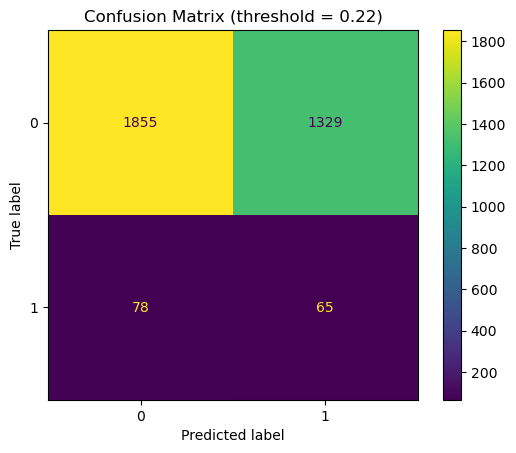

📋 Classification Report:

              precision    recall  f1-score   support

           0     0.9596    0.5826    0.7250      3184
           1     0.0466    0.4545    0.0846       143

    accuracy                         0.5771      3327
   macro avg     0.5031    0.5186    0.4048      3327
weighted avg     0.9204    0.5771    0.6975      3327

📈 Evaluation Metrics:
Accuracy:  0.5771
Precision: 0.0466
Recall:    0.4545
F1 Score:  0.0846
ROC AUC:   0.5374
PR AUC:    0.0463

🔍 Feature Importance (Top 15):
                 Feature  Importance
1             is_weekend    0.138065
12       hungry_weighted    0.071040
13            EMA_T_Diff    0.038233
11              Time_24h    0.031600
36            Sleep_Diff    0.029446
35   Efficiency_weighted    0.027523
34    TimeInBed_weighted    0.025987
24     mean_intensity_3h    0.025775
33           HR_slope_3h    0.025646
31           HR_slope_1h    0.024873
8     Std_Glucose_Pre_1h    0.024003
0                Glucose    0.023456
10  

In [164]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay,
    roc_auc_score, average_precision_score
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ Feature definition
X_columns = [
    "Glucose", "is_weekend", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h", "Mean_Glucose_Pre_2h", "Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h", "Std_Glucose_Pre_2h", "Std_Glucose_Pre_2.5h",
    "Time_24h", "hungry_weighted", "EMA_T_Diff", 'Glu_Diff_1','Glu_Diff_2','Glu_Diff_3',
    'Glu_Diff_4', 'Glu_Diff_5', 'Glu_Diff_6','Glu_Diff_7','Glu_Diff_8',
    "mean_intensity_1h", "mean_intensity_2h", "mean_intensity_3h", 
    "HR_mean_1h", "HR_mean_2h", "HR_mean_3h",
    "HR_std_1h", "HR_std_2h", "HR_std_3h",
    "HR_slope_1h", "HR_slope_2h", "HR_slope_3h",
    "TimeInBed_weighted", "Efficiency_weighted", "Sleep_Diff"
]


# ✅ Remove rows with NaNs in selected features
df_model = df[X_columns + ["Onset_GE", "StudyID"]].dropna()

# ✅ Time parsing
df_model["Time_24h"] = pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce")
df_model["Time_24h"] = df_model["Time_24h"].dt.hour + df_model["Time_24h"].dt.minute / 60

# ✅ Convert boolean-like columns
for col in ["is_weekend"]:
    df_model[col] = df_model[col].astype(str).str.lower().map({"true": True, "false": False})

# ✅ Train/Test split with GroupShuffleSplit
splitter = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df_model, groups=df_model["StudyID"]))
df_train = df_model.iloc[train_idx]
df_test = df_model.iloc[test_idx]

# ✅ Preprocessing function
def preprocess(df):
    X = df[X_columns].copy()
    for col in X.select_dtypes(include="bool").columns:
        X[col] = X[col].astype(int)
    y = df["Onset_GE"].astype(int).values
    return X.values.astype(np.float64), y

X_train_raw, y_train = preprocess(df_train)
X_test, y_test = preprocess(df_test)


# ✅ SMOTE oversampling
minority_class_size = np.bincount(y_train)[1]
k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train, y_train = smote.fit_resample(X_train_raw, y_train)

# ✅ Train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# ✅ Prediction and evaluation
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.22
y_pred_thresh = (y_proba >= threshold).astype(int)

# ✅ Evaluation
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thresh)
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred_thresh, digits=4))
print("📈 Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_thresh):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR AUC:    {average_precision_score(y_test, y_proba):.4f}")

# ✅ Feature importance
used_feature_names = df_model[X_columns].dropna().columns.tolist()

importances = pd.DataFrame({
    "Feature": used_feature_names,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print("\n🔍 Feature Importance (Top 15):")
print(importances.head(15))

In [162]:
df.groupby("is_weekend")["Onset_GE"].mean()

is_weekend
False    0.029011
True     0.026708
Name: Onset_GE, dtype: object

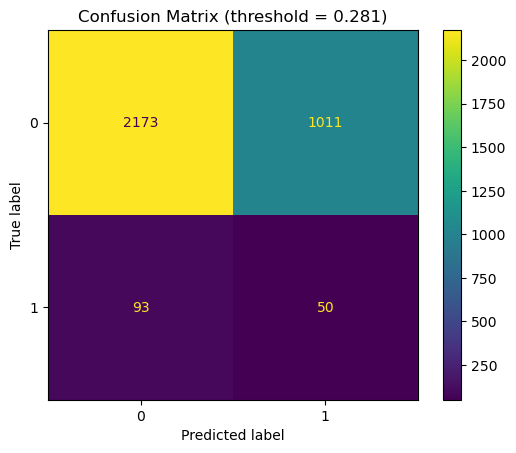

📋 Classification Report:

              precision    recall  f1-score   support

           0     0.9590    0.6825    0.7974      3184
           1     0.0471    0.3497    0.0831       143

    accuracy                         0.6682      3327
   macro avg     0.5030    0.5161    0.4402      3327
weighted avg     0.9198    0.6682    0.7667      3327

📈 Evaluation Metrics:
Accuracy:  0.6682
Precision: 0.0471
Recall:    0.3497
F1 Score:  0.0831
ROC AUC:   0.5305
PR AUC:    0.0460

🔍 Feature Importance (Top 15):
                  Feature  Importance
11        hungry_weighted    0.080266
12             EMA_T_Diff    0.045582
35             Sleep_Diff    0.037453
10               Time_24h    0.036871
34    Efficiency_weighted    0.035265
32            HR_slope_3h    0.033139
33     TimeInBed_weighted    0.032480
23      mean_intensity_3h    0.032031
21      mean_intensity_1h    0.028011
7      Std_Glucose_Pre_1h    0.027756
6   Mean_Glucose_Pre_2.5h    0.027354
9    Std_Glucose_Pre_2.5h    

In [190]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay,
    roc_auc_score, average_precision_score
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ Feature definition
X_columns = [
    "Glucose", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h", "Mean_Glucose_Pre_2h", "Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h", "Std_Glucose_Pre_2h", "Std_Glucose_Pre_2.5h",
    "Time_24h", "hungry_weighted", "EMA_T_Diff", 'Glu_Diff_1','Glu_Diff_2','Glu_Diff_3',
    'Glu_Diff_4', 'Glu_Diff_5', 'Glu_Diff_6','Glu_Diff_7','Glu_Diff_8',
    "mean_intensity_1h", "mean_intensity_2h", "mean_intensity_3h", 
    "HR_mean_1h", "HR_mean_2h", "HR_mean_3h",
    "HR_std_1h", "HR_std_2h", "HR_std_3h",
    "HR_slope_1h", "HR_slope_2h", "HR_slope_3h",
    "TimeInBed_weighted", "Efficiency_weighted", "Sleep_Diff"
]


# ✅ Remove rows with NaNs in selected features
for col in ["TimeInBed_weighted", "Efficiency_weighted", "Sleep_Diff"]:
    df = df[df[col] >= 0]
df_model = df[X_columns + ["Onset_GE", "StudyID"]].dropna()

# ✅ Time parsing
df_model["Time_24h"] = pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce")
df_model["Time_24h"] = df_model["Time_24h"].dt.hour + df_model["Time_24h"].dt.minute / 60



# ✅ Train/Test split with GroupShuffleSplit
splitter = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df_model, groups=df_model["StudyID"]))
df_train = df_model.iloc[train_idx]
df_test = df_model.iloc[test_idx]

# ✅ Preprocessing function
def preprocess(df):
    X = df[X_columns].copy()
    for col in X.select_dtypes(include="bool").columns:
        X[col] = X[col].astype(int)
    y = df["Onset_GE"].astype(int).values
    return X.values.astype(np.float64), y

X_train_raw, y_train = preprocess(df_train)
X_test, y_test = preprocess(df_test)


# ✅ SMOTE oversampling
minority_class_size = np.bincount(y_train)[1]
k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train, y_train = smote.fit_resample(X_train_raw, y_train)

# ✅ Train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# ✅ Prediction and evaluation
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.281
y_pred_thresh = (y_proba >= threshold).astype(int)

# ✅ Evaluation
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thresh)
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred_thresh, digits=4))
print("📈 Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_thresh):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR AUC:    {average_precision_score(y_test, y_proba):.4f}")

# ✅ Feature importance
used_feature_names = df_model[X_columns].dropna().columns.tolist()

importances = pd.DataFrame({
    "Feature": used_feature_names,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print("\n🔍 Feature Importance (Top 15):")
print(importances.head(15))

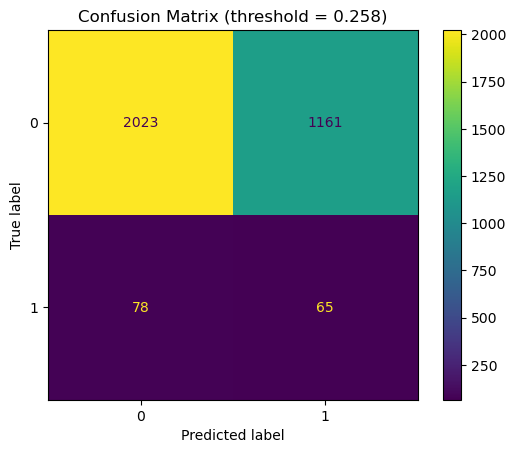

📋 Classification Report:

              precision    recall  f1-score   support

           0     0.9629    0.6354    0.7656      3184
           1     0.0530    0.4545    0.0950       143

    accuracy                         0.6276      3327
   macro avg     0.5079    0.5450    0.4303      3327
weighted avg     0.9238    0.6276    0.7367      3327

📈 Evaluation Metrics:
Accuracy:  0.6276
Precision: 0.0530
Recall:    0.4545
F1 Score:  0.0950
ROC AUC:   0.5419
PR AUC:    0.0495

🔍 Feature Importance (Top 15):
                Feature  Importance
11      hungry_weighted    0.078518
10             Time_24h    0.043677
29   TimeInBed_weighted    0.042257
30  Efficiency_weighted    0.037719
0               Glucose    0.035258
20    mean_intensity_1h    0.035138
24           HR_mean_2h    0.033856
28          HR_slope_2h    0.033626
1          Slope_Pre_1h    0.033359
7    Std_Glucose_Pre_1h    0.033187
18           Glu_Diff_7    0.032704
22    mean_intensity_3h    0.032362
27          HR_sl

In [189]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay,
    roc_auc_score, average_precision_score
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ Feature definition
X_columns = [
    "Glucose", "Slope_Pre_1h", "Slope_Pre_2h", "Slope_Pre_2.5h", 
    "Mean_Glucose_Pre_1h", "Mean_Glucose_Pre_2h", "Mean_Glucose_Pre_2.5h",
    "Std_Glucose_Pre_1h", "Std_Glucose_Pre_2h", "Std_Glucose_Pre_2.5h",
    "Time_24h", "hungry_weighted", 'Glu_Diff_1','Glu_Diff_2','Glu_Diff_3',
    'Glu_Diff_4', 'Glu_Diff_5', 'Glu_Diff_6','Glu_Diff_7','Glu_Diff_8',
    "mean_intensity_1h", "mean_intensity_2h", "mean_intensity_3h", 
    "HR_mean_1h", "HR_mean_2h",
    "HR_std_1h", "HR_std_2h",
    "HR_slope_1h", "HR_slope_2h",
    "TimeInBed_weighted", "Efficiency_weighted"
]


# ✅ Remove rows with NaNs in selected features
# Step 1: Remove negative values
for col in ["TimeInBed_weighted", "Efficiency_weighted", "Sleep_Diff"]:
    df = df[df[col] >= 0]
df_model = df[X_columns + ["Onset_GE", "StudyID"]].dropna()

# ✅ Time parsing
df_model["Time_24h"] = pd.to_datetime(df_model["Time_24h"], format="%H:%M", errors="coerce")
df_model["Time_24h"] = df_model["Time_24h"].dt.hour + df_model["Time_24h"].dt.minute / 60



# ✅ Train/Test split with GroupShuffleSplit
splitter = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(df_model, groups=df_model["StudyID"]))
df_train = df_model.iloc[train_idx]
df_test = df_model.iloc[test_idx]

# ✅ Preprocessing function
def preprocess(df):
    X = df[X_columns].copy()
    for col in X.select_dtypes(include="bool").columns:
        X[col] = X[col].astype(int)
    y = df["Onset_GE"].astype(int).values
    return X.values.astype(np.float64), y

X_train_raw, y_train = preprocess(df_train)
X_test, y_test = preprocess(df_test)


# ✅ SMOTE oversampling
minority_class_size = np.bincount(y_train)[1]
k_neighbors = min(5, minority_class_size - 1) if minority_class_size > 1 else 1
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train, y_train = smote.fit_resample(X_train_raw, y_train)

# ✅ Train the RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# ✅ Prediction and evaluation
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.258
y_pred_thresh = (y_proba >= threshold).astype(int)

# ✅ Evaluation
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thresh)
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred_thresh, digits=4))
print("📈 Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_thresh):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_thresh, zero_division=0):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR AUC:    {average_precision_score(y_test, y_proba):.4f}")

# ✅ Feature importance
used_feature_names = df_model[X_columns].dropna().columns.tolist()

importances = pd.DataFrame({
    "Feature": used_feature_names,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print("\n🔍 Feature Importance (Top 15):")
print(importances.head(15))

In [188]:
best_f1, best_thresh = 0, 0
for t in np.linspace(0.05, 0.5, 40):
    preds = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t
print(f"Best threshold: {best_thresh:.3f}, Best F1: {best_f1:.4f}")


Best threshold: 0.258, Best F1: 0.0950


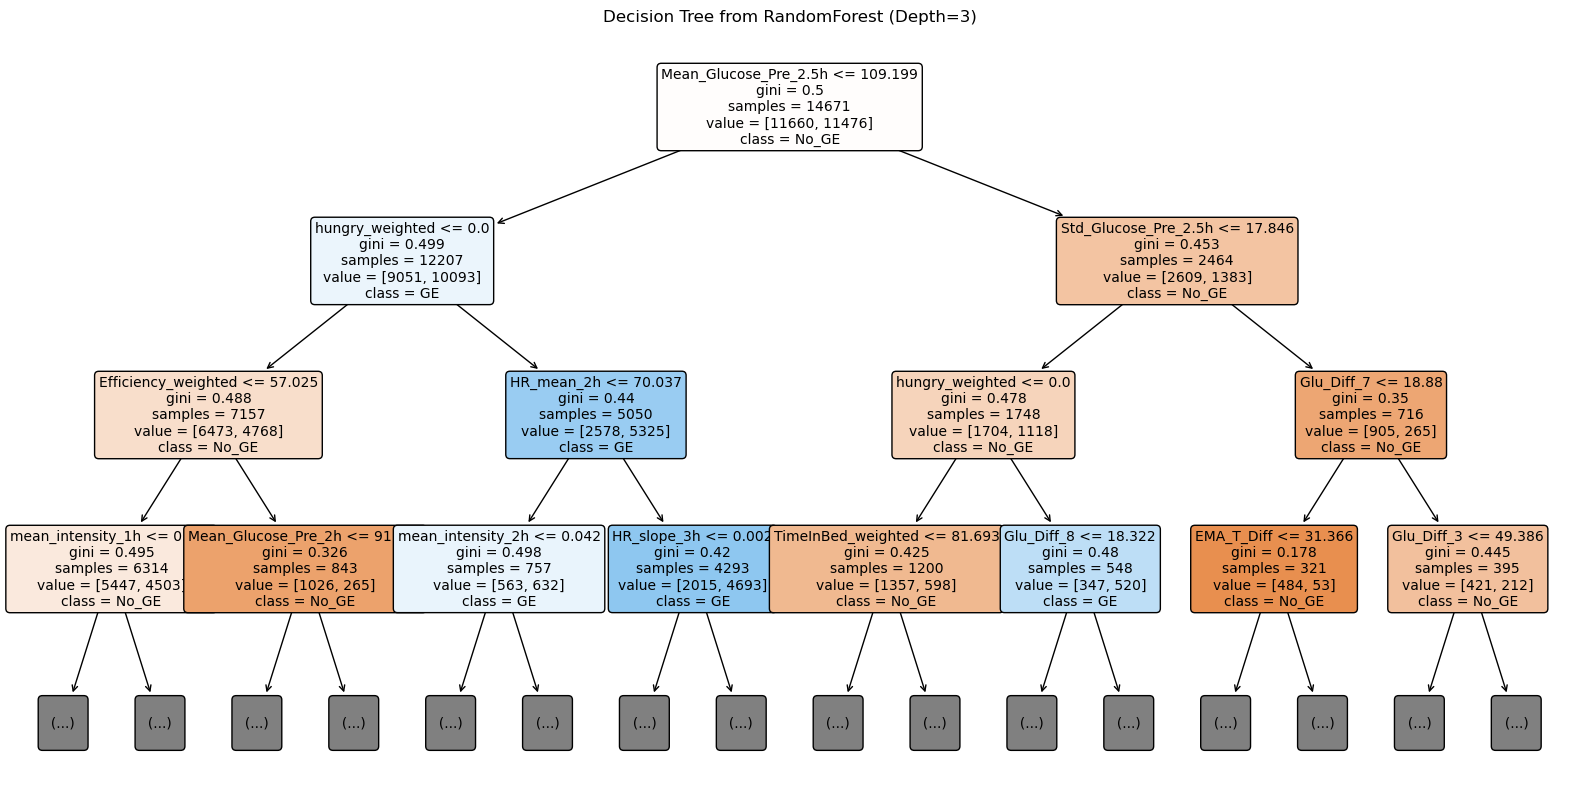

In [191]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the first decision tree from the RandomForest (with depth limit)
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(
    model.estimators_[0],             # Select the first tree from the forest
    feature_names=X_columns,          # Provide feature names for readability
    class_names=["No_GE", "GE"],      # Class labels for the output
    filled=True,                      # Color nodes by predicted class
    rounded=True,                     # Rounded node boxes
    max_depth=3,                      # Limit tree depth for clarity
    fontsize=10                       # Set font size for node text
)
plt.title("Decision Tree from RandomForest (Depth=3)")
plt.show()



In [192]:
from collections import Counter

# 첫 번째 트리에서 사용된 데이터 인덱스 확인
tree_indices = model.estimators_[0].random_state

# 또는 확실하게 확인하고 싶다면:
Counter(model.estimators_[0].tree_.value[0][0])


Counter({11660.0: 1, 11476.0: 1})

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/3559563829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Onset_GE", y=feature, palette="Set2", inner="quartile")


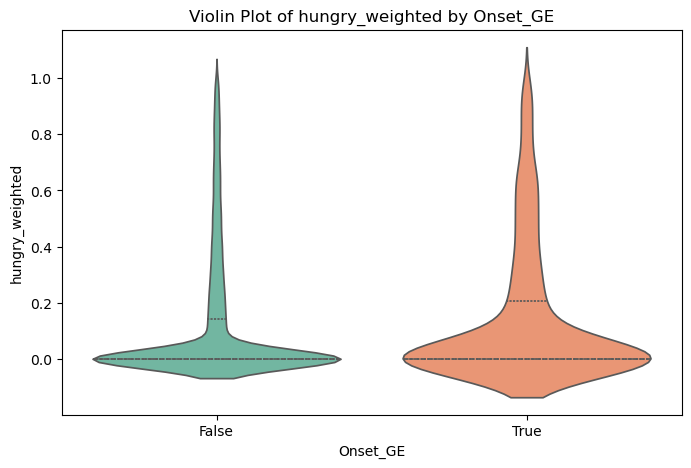

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/3559563829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Onset_GE", y=feature, palette="Set2", inner="quartile")


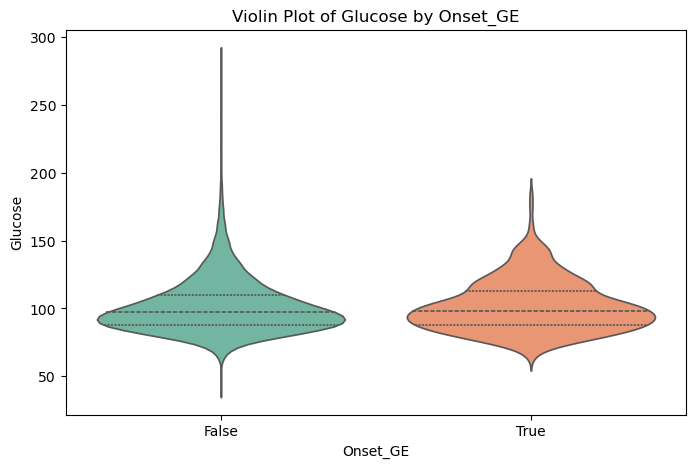

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/3559563829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Onset_GE", y=feature, palette="Set2", inner="quartile")


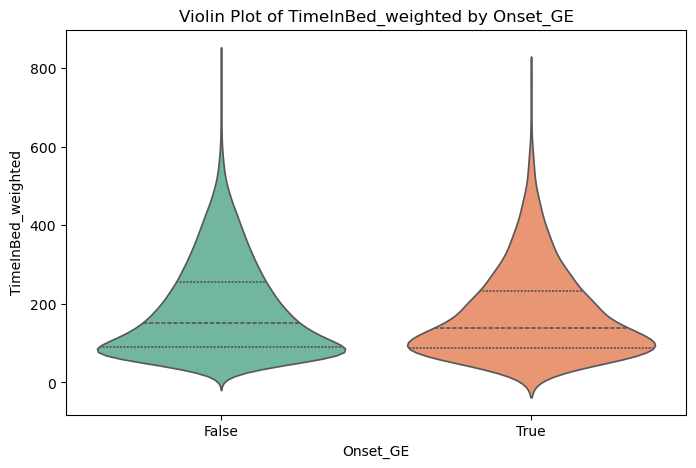

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/3559563829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Onset_GE", y=feature, palette="Set2", inner="quartile")


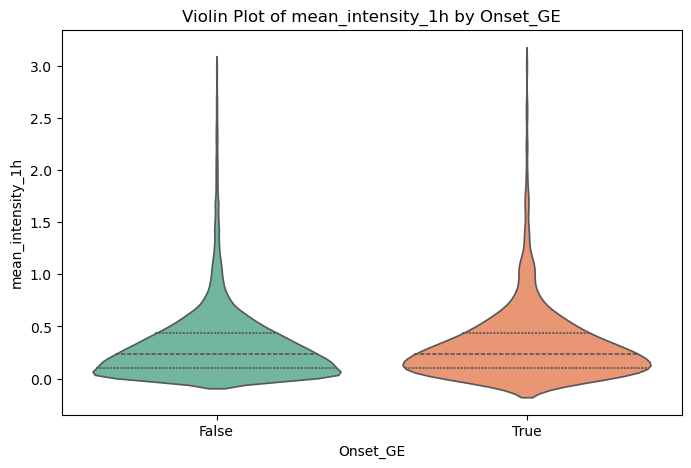

/var/folders/r0/h30ywvr55x98xwjf49klh76m0000gp/T/ipykernel_3549/3559563829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Onset_GE", y=feature, palette="Set2", inner="quartile")


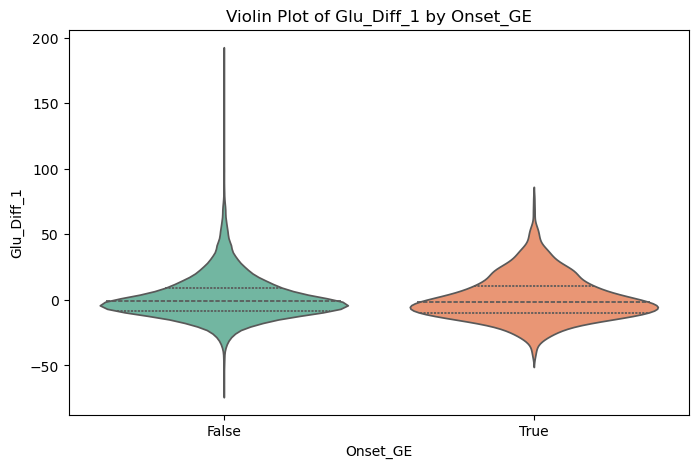

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ["hungry_weighted", "Glucose", "TimeInBed_weighted",'mean_intensity_1h','Glu_Diff_1']

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x="Onset_GE", y=feature, palette="Set2", inner="quartile")
    plt.title(f"Violin Plot of {feature} by Onset_GE")
    plt.xlabel("Onset_GE")
    plt.ylabel(feature)
    plt.show()


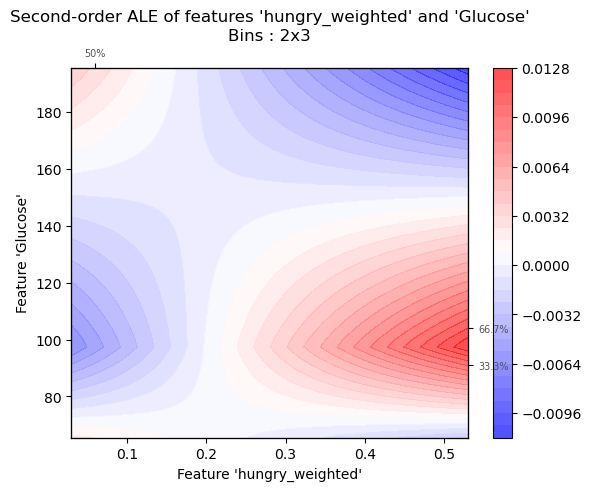

<Axes: title={'center': "Second-order ALE of features 'hungry_weighted' and 'Glucose'\nBins : 2x3"}, xlabel="Feature 'hungry_weighted'", ylabel="Feature 'Glucose'">

In [204]:
from alepython import ale_plot
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", message="X has feature names, but RandomForestClassifier was fitted without feature names")

# Ensure DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_columns)

# 조합: hungry
ale_plot(
    model=model,
    train_set=X_train_df,
    features=["hungry_weighted", "Glucose"],
    monte_carlo_rep=1000,
    bins=3  # 2x2 grid (adjust for finer resolution)
)

In [158]:
# Count and percentage of 0/1 in training and test sets
def show_class_distribution(y_train, y_test):
    train_counts = pd.Series(y_train).value_counts().sort_index()
    test_counts = pd.Series(y_test).value_counts().sort_index()

    print("🧪 Train Set:")
    for label in train_counts.index:
        pct = train_counts[label] / train_counts.sum() * 100
        print(f"  Class {label}: {train_counts[label]} ({pct:.2f}%)")

    print("\n🧪 Test Set:")
    for label in test_counts.index:
        pct = test_counts[label] / test_counts.sum() * 100
        print(f"  Class {label}: {test_counts[label]} ({pct:.2f}%)")

# Run the function
show_class_distribution(y_train, y_test)


🧪 Train Set:
  Class 0: 12033 (50.00%)
  Class 1: 12033 (50.00%)

🧪 Test Set:
  Class 0: 3177 (95.69%)
  Class 1: 143 (4.31%)


In [85]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=15)
X_new = selector.fit_transform(X_train, y_train)

selected_features = [X_columns[i] for i in selector.get_support(indices=True)]
print("Top features:", selected_features)


Top features: ['Glucose', 'Slope_Pre_1h', 'Slope_Pre_2h', 'Slope_Pre_2.5h', 'Mean_Glucose_Pre_1h', 'Mean_Glucose_Pre_2h', 'Mean_Glucose_Pre_2.5h', 'Std_Glucose_Pre_1h', 'Time_24h', 'mean_intensity_1h', 'mean_intensity_2h', 'mean_intensity_3h', 'TimeInBed', 'Efficiency', 'Sleep_Diff']


In [39]:
# decrease features